In [3]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Задание 1

# Вопросы
1. Что такое RandomState в функции random и random_state в функции train_test_split?
2. Что такое fit_intersept в встроенных функциях из sklearn?
3. Что такое plt.scatter?

## 1.1
Используя встроенные функции пакета sklearn, реализуйте небольшие программы моделирующие лин. регрессию с регуляризацией L1 или L2 на искусственных данных.

In [83]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Данные

In [207]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = x ** 2 + 2 * rng.randn(100)

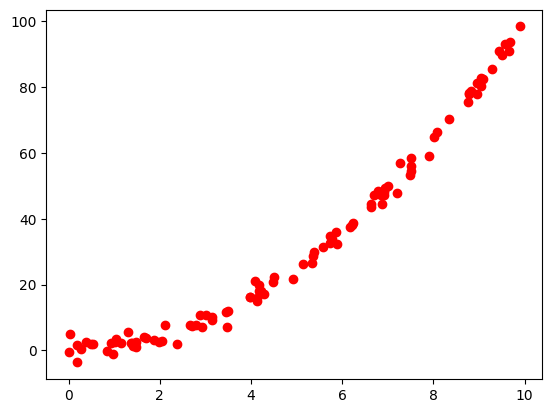

In [208]:
plt.scatter(x, y, c='red')

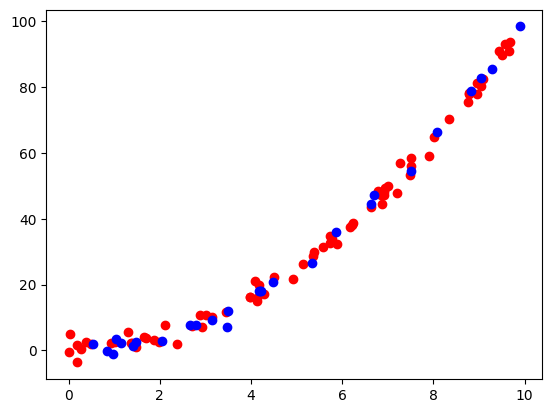

In [209]:
poly_reg = PolynomialFeatures(degree=n)
x_train, x_test, y_train, y_test = train_test_split(x[:, np.newaxis], y, test_size=0.27, random_state=42) 
plt.scatter(x_train, y_train, c='red')
plt.scatter(x_test, y_test, c='blue')

### Лассо

In [210]:
model_lasso = Lasso(fit_intercept=True)

In [211]:
model_lasso.fit(x_train, y_train)

Lasso()

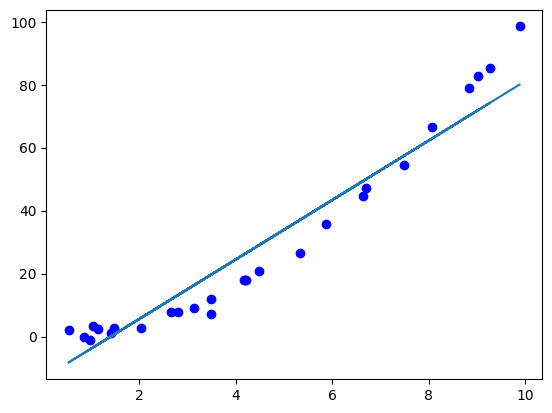

In [212]:
plt.scatter(x_test, y_test, c ='blue')
plt.plot(x_test, model_lasso.predict(x_test))

In [213]:
model_lasso.score(x_train, y_train)

0.9240505076791785

In [214]:
model_lasso.score(x_test, y_test)

0.9322826793385182

#### Лассо с полиномиальными фичами

In [323]:
x_train_1 = 10 * rng.rand(100)
y_train_1 = x_train_1 ** 2 + 5 * rng.randn(100)
x_test_1 = np.linspace(np.min(x_train_1), np.max(x_train_1), 50)
y_test_1 = x_test_1 ** 2 + 2 * rng.randn(50)

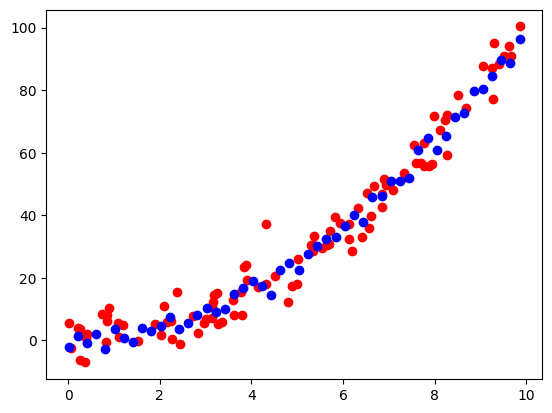

In [324]:
plt.scatter(x_train_1, y_train_1, c='red')
plt.scatter(x_test_1, y_test_1, c='blue')

In [325]:
# n = 6
# n = 3
n = 100
# n = 150
poly_reg = PolynomialFeatures(degree=n)
x_train_1_with_features = poly_reg.fit_transform(x_train_1[:, np.newaxis])

In [326]:
model_lasso_1 = Lasso(fit_intercept=True, alpha=0.1, tol=0.1, max_iter=100000)
model_lasso_1.fit(x_train_1_with_features, y_train_1)

Lasso(alpha=0.1, max_iter=100000, tol=0.1)

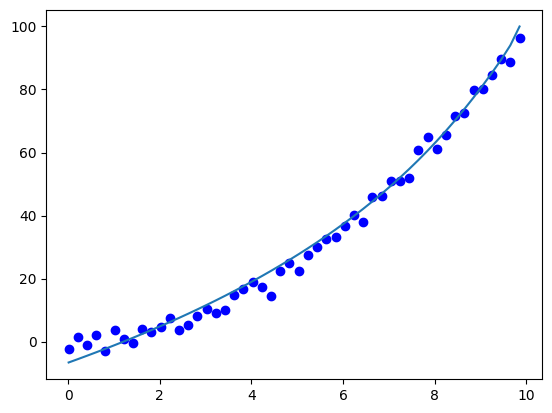

In [327]:
plt.scatter(x_test_1, y_test_1, c ='blue')
plt.plot(x_test_1, model_lasso_1.predict(poly_reg.fit_transform(x_test_1[:, np.newaxis])))

In [328]:
model_lasso_1.score(x_train_1_with_features, y_train_1)

0.9581094045234997

In [329]:
model_lasso_1.score(poly_reg.fit_transform(x_test_1[:, np.newaxis]), y_test_1)

0.9894096646330631

### Ридж

In [317]:
model_ridge = Ridge(fit_intercept=True)

In [318]:
model_ridge.fit(x_train, y_train)

Ridge()

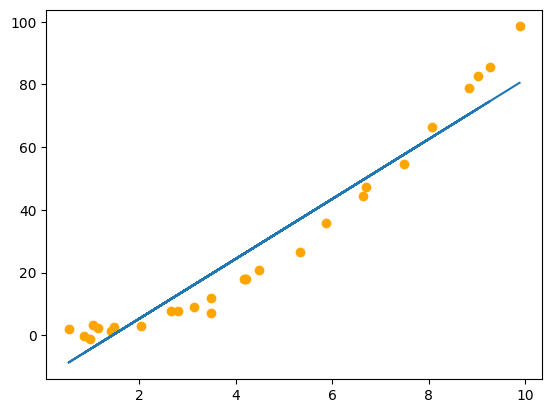

In [319]:
plt.scatter(x_test, y_test, c ='orange')
plt.plot(x_test, model_ridge.predict(x_test))

In [320]:
model_ridge.score(x_train, y_train)

0.9241822856476793

In [321]:
model_ridge.score(x_test, y_test)

0.9335045248689853

#### Ридж с полиномиальными фичами

In [322]:
x_train_2 = 10 * rng.rand(100)
y_train_2 = np.sin(x_train_2) + 0.1 * rng.randn(100)
x_test_2 = np.linspace(np.min(x_train_2), np.max(x_train_2), 50)
y_test_2 = np.sin(x_test_2) + 0.1 * rng.randn(50)

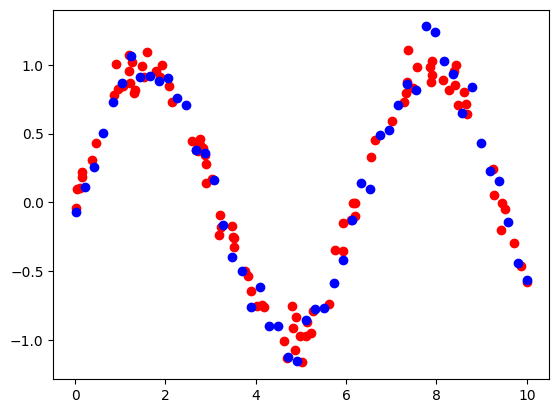

In [330]:
plt.scatter(x_train_2, y_train_2, c='red')
plt.scatter(x_test_2, y_test_2, c='blue')

In [609]:
# n = 6
n = 20
# n = 50
# n = 150
poly_reg = PolynomialFeatures(degree=n)
x_train_2_with_features = poly_reg.fit_transform(x_train_2[:, np.newaxis])

In [610]:
model_ridge_1 = Ridge(fit_intercept=True, alpha=0.5, max_iter=100000)
model_ridge_1.fit(x_train_2_with_features, y_train_2)

Ridge(alpha=0.5, max_iter=100000)

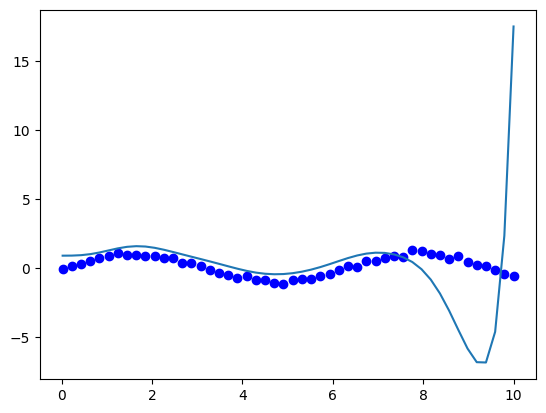

In [611]:
plt.scatter(x_test_2, y_test_2, c ='blue')
plt.plot(x_test_2, model_ridge_1.predict(poly_reg.fit_transform(x_test_2[:, np.newaxis])))

In [612]:
model_ridge_1.score(x_train_2_with_features, y_train_2)

-15.38688477876298

In [613]:
model_ridge_1.score(poly_reg.fit_transform(x_test_2[:, np.newaxis]), y_test_2)

-23.040020904926184

In [565]:
coefs = []

In [614]:
coefs += [list(model_ridge_1.coef_)]

In [615]:
for i in coefs:
    print(i)

[0.0, -0.38699624395142007, 0.03736751888433061]
[0.0, -0.668524618304644, 0.11128662498180474, -0.005082051983295144]
[0.0, 1.7622324748844047, -1.0622537085577084, 0.18470928708820525, -0.009728216789950159]
[0.0, 1.555337276995348, -0.8892342322664274, 0.13391756148757133, -0.0036660599121881026, -0.0002521653979636404]
[0.0, 0.6919724529394341, 0.49670950560266874, -0.5577782965786644, 0.14453746317046534, -0.014522228631870885, 0.0005074537800861315]
[0.0, 0.555666286074191, 0.2477045185343614, -0.07457870139325237, -0.12840800561382631, 0.056686527033592206, -0.008500134020394075, 0.00039223579319341725, 2.5728348525387954e-05, -3.2764098201093597e-06, 9.403165865160562e-08]
[0.0, 4.169540668022315e-05, 0.008921811866979434, 0.41701597768556514, 0.14105698964578406, -0.11764109550228914, -0.15936835832943713, -0.015133009330228639, 0.10479632890979265, 0.01581812670736721, -0.0851874161878231, 0.0612549538416077, -0.024175780984059654, 0.006262959459407146, -0.001134089534389684,

Сделайте выводы о поведении весовых коэффициентов в зависимости от разного количества фич в том числе полиномиальных.

## 1.2

Как регуляризация влияет на метрики качества моделей?

## 1.3

С какими проблемами вы столкнулись при использовании формулы вычисления весов регрессии из ЛР2? Можно ли их решить регуляризацией? С помощью матриц покажите на примере алгебраический смысл регуляризации.

In [26]:
a = np.array([[13, 7, 4], [7, 9, -3], [6.999999999, 8.99999999999, -2.999999999]])
np.linalg.det(a)

1.2433008934755091e-07

https://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm

## 1.4

Модифицируйте вашу собственную функцию для нахождения весов регрессии из ЛР2 таким образом, чтобы она соответсвовала функции потерь L2 - регуляризации. Аналитическое решение задачи оптимизации было получено на лекции. Сравните результаты работы вашей функции со встроенной.

### Своя L2

In [616]:
def get_Q(x, poly_deg):
    X = x[:, np.newaxis]
    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(poly_deg)
    return poly_reg.fit_transform(X)

In [620]:
def get_weights(x, y, poly_deg, alpha):
    Q = get_Q(x, poly_deg)
    return np.dot(np.dot(np.linalg.inv(np.dot(Q.T, Q) + alpha * np.identity(np.dot(Q.T, Q).shape[0])), Q.T), y)

In [622]:
def fit(x_train, x_test, y_train, n, alpha):
    return np.dot(get_weights(x_train, y_train, n, alpha), get_Q(x_test, n).T)

### Коэффициент детерминации

In [618]:
def get_det_coeff(y, Y):
    return 1 - np.dot(y - Y, (y - Y).T) / np.dot(y - np.mean(y), (y - np.mean(y)).T)

### Проверяю

In [623]:
n = 4
alpha = 0.1
y_predicted = fit(x_train_2, x_test_2, y_train_2, n, alpha)

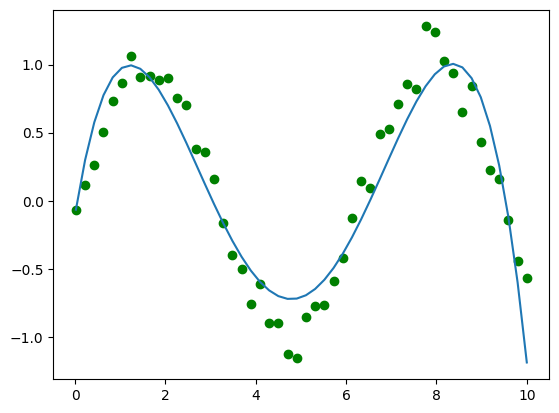

In [624]:
plt.scatter(x_test_2, y_test_2, c ='green')
plt.plot(x_test_2, y_predicted)

In [625]:
get_det_coeff(y_test_2, y_predicted)

0.8896562099466655

### Встроенная

In [626]:
poly_reg = PolynomialFeatures(degree=n)
x_train_3_with_features = poly_reg.fit_transform(x_train_2[:, np.newaxis])
model_ridge_2 = Ridge(fit_intercept=True, alpha=alpha)
model_ridge_2.fit(x_train_3_with_features, y_train_2)

Ridge(alpha=0.1)

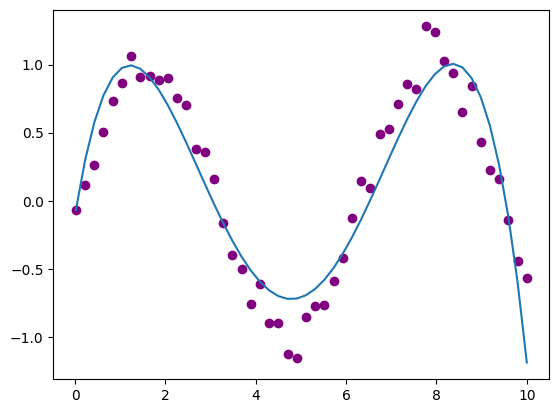

In [627]:
plt.scatter(x_test_2, y_test_2, c ='purple')
plt.plot(x_test_2, model_ridge_2.predict(poly_reg.fit_transform(x_test_2[:, np.newaxis])))

In [630]:
model_ridge_2.score(poly_reg.fit_transform(x_test_2[:, np.newaxis]), y_test_2)

0.8897408412711562

# Задание 2

### 2.1

На искусственных данных смоделируйте переобучение модели линейной регрессии.

#### Переобучение Linear Regression

In [704]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(60)
y = np.tan(x)/10 + 0.5 * rng.randn(60)

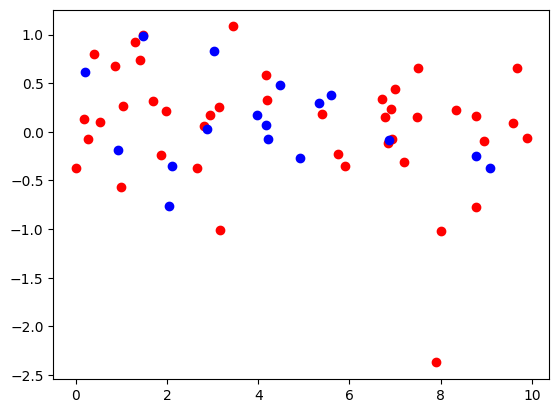

In [705]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x[:, np.newaxis], y, test_size=0.27, random_state=42) 
plt.scatter(x_train_3, y_train_3, c='red')
plt.scatter(x_test_3, y_test_3, c='blue')

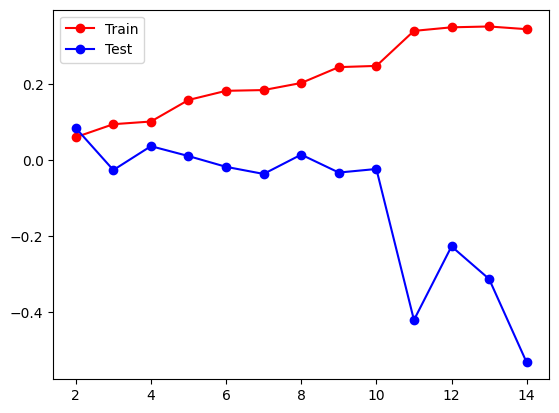

In [706]:
degress = list(range(2, 15))
scores_test = []
scores_train = []
for i in degress:
    model = make_pipeline(PolynomialFeatures(degree=i),
                          LinearRegression(fit_intercept=False))
    model.fit(x_train_3, y_train_3)
    scores_test.append(model.score(x_test_3, y_test_3))
    scores_train.append(model.score(x_train_3, y_train_3))
plt.plot(degress, scores_train, 'r-o')
plt.plot(degress, scores_test, 'b-o')
plt.legend(['Train', 'Test'])

#### Переобучение с использованием своей L2

In [707]:
# n = 4
alpha = 1
# y_predicted = fit(x_train_2, x_test_2, y_train_2, n, alpha)

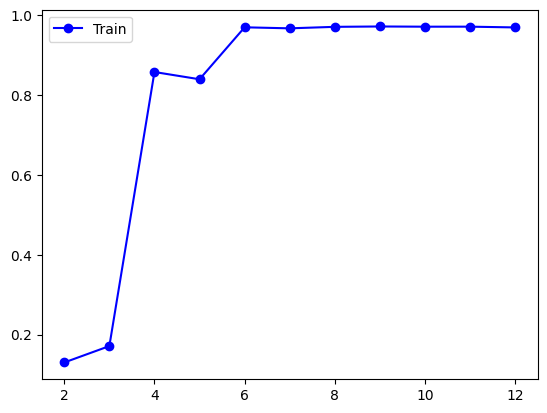

In [716]:
degress = list(range(2, 13))
scores_test = []
scores_train = []
for i in degress:
    y_predicted = fit(x_train_2, x_test_2, y_train_2, i, alpha)
    scores_test.append(get_det_coeff(y_test_2, y_predicted))
    # scores_train.append(model.score(x_train_3, y_train_3))
# plt.plot(degress, scores_train, 'r-o')
plt.plot(degress, scores_test, 'b-o')
plt.legend(['Train', 'Test'])

### 2.2

С помощью различных моделей регуляризации попробуйте сохранив сложность модели, которая увеличивает качество, избежать переобучения. Потренируйтесь в подборе коэффициентов силы регуляризации.